# Diseño Experimental

inicio

## Codigo

### Instalación de librerías

In [414]:
# pip install sinfo
# pip install pingouin

### Importación librerías

In [415]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# import statsmodels.formula.api as smf
# from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import pingouin as pg


import warnings
from sinfo import sinfo

### Configuración general

In [416]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
warnings.filterwarnings('ignore')

### Lectura de archivos

#### Lectura - Cultivos y productos de ganadería (QCL)

In [417]:
# Cultivos y productos de ganadería (QLC)
# https://www.fao.org/faostat/es/#data/QCL

df_qcl_all = pd.read_csv('data/qcl_cultivos-y-productos-de-ganadería.csv', low_memory=False)

df_qcl_all.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,QCL,Cultivos y productos de ganadería,188,Costa Rica,5312,Área cosechada,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,ha,500.0,E,Valor estimado,NaN
1,QCL,Cultivos y productos de ganadería,188,Costa Rica,5419,Rendimiento,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,100 g/ha,10400.0,E,Valor estimado,NaN
2,QCL,Cultivos y productos de ganadería,188,Costa Rica,5510,Producción,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,toneladas,520.0,X,Cifra de fuentes internacionales,Cifras no oficiales
3,QCL,Cultivos y productos de ganadería,188,Costa Rica,5312,Área cosechada,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,ha,700.0,E,Valor estimado,NaN
4,QCL,Cultivos y productos de ganadería,188,Costa Rica,5419,Rendimiento,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,100 g/ha,10357.0,E,Valor estimado,NaN


#### Lectura - Cultivos y productos de ganadería (TLC)


In [418]:
# Cultivos y productos de ganadería (TLC)
# https://www.fao.org/faostat/es/#data/TCL

df_tlc_all = pd.read_csv('data/tlc_cultivos-y-productos-de-ganadería.csv', low_memory=False)

df_tlc_all.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,toneladas,87.0,A,Cifra oficial,NaN
1,TCL,Cultivos y productos de ganadería,188,Costa Rica,5922,Exportaciones Valor,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,1000 US$,20.0,A,Cifra oficial,NaN
2,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,toneladas,182.0,A,Cifra oficial,NaN
3,TCL,Cultivos y productos de ganadería,188,Costa Rica,5922,Exportaciones Valor,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,1000 US$,42.0,A,Cifra oficial,NaN
4,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1963,1963,toneladas,35.0,A,Cifra oficial,NaN


#### Lectura - Uso de la tierra (RL)

In [419]:
# Uso de la tierra (RL)
# https://www.fao.org/faostat/es/#data/RL

df_rl_all = pd.read_csv('data/rl_uso-de-la-tierra.csv', low_memory=False)

df_rl_all.head()



# tipos = df_rl_all['Elemento'].unique()

# print(tipos)

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto,Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,RL,Uso de la tierra,188,Costa Rica,5110,Superficie,6600,Superficie del País,1961,1961,1000 ha,5110.0,A,Cifra oficial,NaN
1,RL,Uso de la tierra,188,Costa Rica,5110,Superficie,6600,Superficie del País,1962,1962,1000 ha,5110.0,A,Cifra oficial,NaN
2,RL,Uso de la tierra,188,Costa Rica,5110,Superficie,6600,Superficie del País,1963,1963,1000 ha,5110.0,A,Cifra oficial,NaN
3,RL,Uso de la tierra,188,Costa Rica,5110,Superficie,6600,Superficie del País,1964,1964,1000 ha,5110.0,A,Cifra oficial,NaN
4,RL,Uso de la tierra,188,Costa Rica,5110,Superficie,6600,Superficie del País,1965,1965,1000 ha,5110.0,A,Cifra oficial,NaN


#### Lectura - Variación de temperatura de la superficie terrestre (ET)

In [420]:
# Variación de temperatura de la superficie terrestre (ET)
# https://www.fao.org/faostat/es/#data/ET

df_et_all = pd.read_csv('data/et_variación-de-temperatura-de-la-superficie-terrestre.csv', low_memory=False)

df_et_all.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código Meses,Meses,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
0,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1961,1961,°C,0.866,E,Valor estimado
1,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1962,1962,°C,-0.322,E,Valor estimado
2,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1963,1963,°C,-0.411,E,Valor estimado
3,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1964,1964,°C,0.800,E,Valor estimado
4,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1965,1965,°C,0.011,E,Valor estimado


#### Lectura - Indicadores de precipitaciones a nivel subnacional rainfall (RFH)

In [421]:
# Indicadores de precipitaciones a nivel subnacional (rainfall)
# https://data.humdata.org/dataset/cri-rainfall-subnational

df_rainfall_all = pd.read_csv('data/cri-rainfall-adm2-full.csv', low_memory=False)

df_rainfall_all.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,1981-01-01,14508,CR406,1.0,29.0,34.6333,NaN,NaN,NaN,NaN,85.7864,NaN,NaN,final
1,1981-01-11,14508,CR406,1.0,27.0,26.1000,NaN,NaN,NaN,NaN,102.8939,NaN,NaN,final
2,1981-01-21,14508,CR406,1.0,18.0,24.1667,74.0,84.9000,NaN,NaN,78.8571,88.5142,NaN,final
3,1981-02-01,14508,CR406,1.0,17.0,17.7000,62.0,67.9667,NaN,NaN,96.9163,92.3472,NaN,final
4,1981-02-11,14508,CR406,1.0,15.0,15.2000,50.0,57.0667,NaN,NaN,99.0099,89.4632,NaN,final


#### Lectura - Indicadores de pr, tas y tasmax (TAS)

In [422]:
# Indicadores pr, tas y tasmax para costa rica por mes y año
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr,tas,tasmax_timeseries_annual,monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI?_format=json

# Precipitation media (PR)
# Average Mean Surface Air Temperature (TAS)
# Average Maximum Surface Air Temperature (TASMAX)


df_tas_annual_all = pd.read_excel('data/pr,tas,tasmax_timeseries_annual,monthly_1901-2022_mean_historical.xlsx', sheet_name='tas_annual')
df_tas_monthly_all = pd.read_excel('data/pr,tas,tasmax_timeseries_annual,monthly_1901-2022_mean_historical.xlsx', sheet_name='tas_monthly')

df_tas_annual_all.head()
df_tas_monthly_all.head()



,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,23.74,24.22,25.04,25.46,24.98,24.33,24.37,24.23,...,25.56,25.73,25.43,24.04,25.01,24.52,24.34,24.61,23.72,24.21


#### Lectura - Indicadores por provincias de PR, TAS, TASMAX & TASMIN (NO USADOS)

In [423]:
# # Indicadores de precipitation media (PR)
# # https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

# df_pr_all = pd.read_excel('data/pr_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
# df_pr_all.head()

# # Indicadores de Average Mean Surface Air Temperature (TAS)
# # https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tas_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

# df_tas_all = pd.read_excel('data/tas_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
# df_tas_all.head()

# # Indicadores de Average Maximum Surface Air Temperature (TASMAX)
# # https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tasmax_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

# df_tasmax_all = pd.read_excel('data/tasmax_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
# df_tasmax_all.head()

# # Indicadores de Average Minimum Surface Air Temperature (TASMIN)
# # https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tasmin_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

# df_tasmin_all = pd.read_excel('data/tasmin_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
# df_tasmin_all.head()

### Limpieza de datos

In [424]:

# Configuracion general para limpieza

inicio_rango_años_limpieza = 1981
fin_rango_años_limpieza = 2021
codigo_aceite_palma = '2165'
tipo_de_uso_tierra = 'Cultivos permanentes'

#### Limpieza para la QLC

In [425]:
# Limpieza para la QLC

# Reduccion del columnas
df_qcl = df_qcl_all[['Año', 'Código del producto (CPC)', 'Producto', 'Código del elemento', 'Elemento','Valor']]

# Obtener solo los valores de la columna Elemento que tenga el valor Producción
df_qcl = df_qcl[df_qcl['Elemento'] == 'Producción']

# Eliminar la columna de Código del elemento y Elemento
df_qcl.drop(columns=['Código del elemento'], inplace=True)
df_qcl.drop(columns=['Elemento'], inplace=True)

# Renombrar columnas
df_qcl.rename(columns={
        'Año': 'año',
        'Código del producto (CPC)': 'id_prod',
        'Producto': 'producto',
        'Código del elemento': 'id_elem',
        'Valor': 'produccion_ton',
    }, 
    inplace=True
)

# Definir seleccionar en rango de años
df_qcl = df_qcl[(df_qcl['año'] >= inicio_rango_años_limpieza) & (df_qcl['año'] <= fin_rango_años_limpieza)]

# Usar unicamente el producto de aceite de palma codigo 2165
df_qcl = df_qcl[df_qcl['id_prod'] == codigo_aceite_palma]

# Print
# print(df_qcl)
df_qcl.head()


,año,id_prod,producto,produccion_ton
759,1981,2165,"Aceite, palma",37300.0
760,1982,2165,"Aceite, palma",39900.0
761,1983,2165,"Aceite, palma",43400.0
762,1984,2165,"Aceite, palma",43196.0
763,1985,2165,"Aceite, palma",35583.0


#### Limpieza para la TLC

In [426]:
# Limpieza para la TLC

# Reduccion del columnas
df_tlc = df_tlc_all[['Año', 'Código del producto (CPC)', 'Producto', 'Código del elemento', 'Elemento', 'Unidad', 'Valor']]

# Renombrar columnas
df_tlc.rename(columns={
        'Año': 'año',
        'Código del producto (CPC)': 'id_prod',
        'Producto': 'producto'
    }, 
    inplace=True
)

# Filtrar el DataFrame para mantener solo los elementos requeridos
df_tlc = df_tlc[df_tlc['Elemento'].isin([
    'Exportaciones - Canditad', 
    'Exportaciones Valor', 
    'Importaciones - Cantidad', 
    'Importaciones Valor'])]

# Filtrar solo los elementos específicos y agregar a nuevas columnas
df_tlc['tlc_exp_ton'] = df_tlc.loc[df_tlc['Elemento'] == 'Exportaciones - Canditad', 'Valor']
df_tlc['tlc_exp_1000usd'] = df_tlc.loc[df_tlc['Elemento'] == 'Exportaciones Valor', 'Valor']
df_tlc['tlc_imp_ton'] = df_tlc.loc[df_tlc['Elemento'] == 'Importaciones - Cantidad', 'Valor']
df_tlc['tlc_imp_1000usd'] = df_tlc.loc[df_tlc['Elemento'] == 'Importaciones Valor', 'Valor']

# Definir seleccionar en rango de años
df_tlc = df_tlc[(df_tlc['año'] >= inicio_rango_años_limpieza) & (df_tlc['año'] <= fin_rango_años_limpieza)]

# Usar unicamente el producto de aceite de palma codigo 2165
df_tlc = df_tlc[df_tlc['id_prod'] == codigo_aceite_palma]

# Agrupar por año y sumar las nuevas columnas
df_tlc = df_tlc.groupby(['año']).agg({
    'id_prod': 'first',  # first - Tomar el primer valor de la columna
    'producto': 'first',
    'tlc_exp_ton': 'sum',
    'tlc_exp_1000usd': 'sum',
    'tlc_imp_ton': 'sum',
    'tlc_imp_1000usd': 'sum'
}).reset_index()

# tipos = df_tlc['Elemento'].unique()
# print(tipos)

# Print
# print(df_tlc)
df_tlc.head()

,año,id_prod,producto,tlc_exp_ton,tlc_exp_1000usd,tlc_imp_ton,tlc_imp_1000usd
0,1981,2165,"Aceite, palma",4.0,3.0,96.0,188.0
1,1982,2165,"Aceite, palma",5.0,3.0,622.0,532.0
2,1983,2165,"Aceite, palma",24.0,86.0,18.0,35.0
3,1984,2165,"Aceite, palma",22.0,20.0,1053.0,639.0
4,1985,2165,"Aceite, palma",1.0,1.0,2991.0,1815.0


#### Limpieza para la RL

In [427]:
# Limpieza para la RL

# Reduccion del columnas
df_rl = df_rl_all[['Año', 'Código del producto', 'Producto', 'Código del elemento', 'Elemento', 'Unidad', 'Valor']]

# Renombrar columnas
df_rl.rename(columns={
        'Año': 'año',
        'Código del producto': 'id_uso_tierra',
        'Producto': 'tipo_uso_tierra',
        'Código del elemento': 'id_ele',
        'Elemento': 'elemento'
    }, 
    inplace=True
)

# Filtrar el DataFrame para mantener solo los elementos requeridos
df_rl = df_rl[df_rl['tipo_uso_tierra'].isin([tipo_de_uso_tierra])]

# Crear la columna de Superficie de Cultivos permanentes por 1000 ha
df_rl['cult_perm_superficie_1000ha'] = df_rl.loc[
    (df_rl['tipo_uso_tierra'] == tipo_de_uso_tierra) & (df_rl['elemento'] == 'Superficie'),
    'Valor'
]

# Crear la columna de Proporción de tierras agrícolas de Cultivos permanentes
df_rl['cult_perm_procentaje'] = df_rl.loc[
    (df_rl['tipo_uso_tierra'] == tipo_de_uso_tierra) & (df_rl['elemento'] == 'Proporción de tierras agrícolas'),
    'Valor'
]

# Definir seleccionar en rango de años
df_rl = df_rl[(df_rl['año'] >= inicio_rango_años_limpieza) & (df_rl['año'] <= fin_rango_años_limpieza)]

# Agrupar por año y sumar las nuevas columnas
df_rl = df_rl.groupby(['año']).agg({
    # 'id_uso_tierra': 'first',  # first - Tomar el primer valor de la columna
    'tipo_uso_tierra': 'first',
    'cult_perm_superficie_1000ha': 'sum',
    'cult_perm_procentaje': 'sum',
}).reset_index()

# tipos = df_rl['Producto'].unique()
# print(tipos)

# Print
# print(df_rl)
df_rl.head()


,año,tipo_uso_tierra,cult_perm_superficie_1000ha,cult_perm_procentaje
0,1981,Cultivos permanentes,226.0,8.70
1,1982,Cultivos permanentes,229.0,8.55
2,1983,Cultivos permanentes,232.0,8.65
3,1984,Cultivos permanentes,235.0,8.55
4,1985,Cultivos permanentes,238.0,8.88


#### Limpieza para la rainfall (RFH)

In [428]:
# Limpieza para rainfall

# 10 day rainfall [mm] (rfh)
# rainfall long term average [mm] (rfh_avg)
# rainfall anomaly [%] (rfq)

# Reduccion del columnas
df_rainfall = df_rainfall_all[['date', 'rfh']]

# Convertir la columna 'date' a formato datetime
df_rainfall['date'] = pd.to_datetime(df_rainfall['date'], format='%Y-%m-%d')

# # Crear nuevas columnas para año y mes
df_rainfall['año'] = df_rainfall['date'].dt.year
df_rainfall['mes'] = df_rainfall['date'].dt.month

# Asegurar que 'rfh' son numéricos y reemplazar NaNs con 0
df_rainfall['rfh'] = pd.to_numeric(df_rainfall['rfh'], errors='coerce').fillna(0)
# df_rainfall['rfh_avg'] = pd.to_numeric(df_rainfall['rfh_avg'], errors='coerce').fillna(0)

# Definir seleccionar en rango de años
df_rainfall = df_rainfall[(df_rainfall['año'] >= inicio_rango_años_limpieza) & (df_rainfall['año'] <= fin_rango_años_limpieza)]

# Agrupar por año y mes para sumar columnas rfh
rainfall_size = 3 * 12 * (fin_rango_años_limpieza+1 - inicio_rango_años_limpieza)

df_rainfall = df_rainfall.head(rainfall_size).groupby(["año", "mes"])["rfh"].sum().reset_index()

# Calcular la suma anual de 'rfh'

rfh_anual_sum = df_rainfall.groupby('año').agg(
    rfh_anual=('rfh', 'sum'),
).reset_index()

df_rainfall = df_rainfall.merge(rfh_anual_sum, on='año', how='left')

# Crear las nuevas columnas con valores condicionales para todos los meses
for i in range(1, 13):
    df_rainfall[f'rfh_mes{i}'] = df_rainfall.apply(lambda row: row['rfh'] if row['mes'] == i else 0, axis=1)

# Agrupar por año, sumar las nuevas columnas y matener anuales
months = range(1, 13)
agg_dict = {
    'rfh_anual': 'first',
    **{f'rfh_mes{month}': 'sum' for month in months}
}
df_rainfall = df_rainfall.groupby(['año']).agg(agg_dict).reset_index()


df_rfh = df_rainfall

# Print
# print(df_rfh)
df_rfh.head()



,año,rfh_anual,rfh_mes1,rfh_mes2,rfh_mes3,rfh_mes4,rfh_mes5,rfh_mes6,rfh_mes7,rfh_mes8,rfh_mes9,rfh_mes10,rfh_mes11,rfh_mes12
0,1981,3008.0,74.0,48.0,32.0,119.0,289.0,427.0,347.0,430.0,281.0,369.0,397.0,195.0
1,1982,2053.0,60.0,41.0,22.0,61.0,285.0,291.0,251.0,146.0,290.0,404.0,127.0,75.0
2,1983,2122.0,40.0,35.0,48.0,42.0,189.0,190.0,216.0,264.0,336.0,353.0,234.0,175.0
3,1984,2637.0,163.0,99.0,23.0,28.0,226.0,277.0,328.0,355.0,493.0,342.0,199.0,104.0
4,1985,2168.0,51.0,31.0,9.0,34.0,223.0,333.0,244.0,307.0,287.0,368.0,189.0,92.0


#### Limpieza para (TAS)

In [429]:
# Limpieza para tas mensual y anual

# Transponer los headers y los datos
df_tas_annual = df_tas_annual_all.T.reset_index()
df_tas_monthly = df_tas_monthly_all.T.reset_index()

# Cambiar nombres de las columnas actuales
df_tas_annual.columns = ['date', 'tas_anual']
df_tas_monthly.columns = ['date', 'tas_mensual']

# Eliminar las filas 0 y 1
df_tas_annual = df_tas_annual.drop(index=[0, 1]).reset_index(drop=True)
df_tas_monthly = df_tas_monthly.drop(index=[0, 1]).reset_index(drop=True)

# Convertir la columna 'date' a formato datetime
df_tas_annual['date'] = pd.to_datetime(df_tas_annual['date'])
df_tas_monthly['date'] = pd.to_datetime(df_tas_monthly['date'])

# # Crear nuevas columnas para año y mes
df_tas_annual['año'] = df_tas_annual['date'].dt.year

df_tas_monthly['año'] = df_tas_monthly['date'].dt.year
df_tas_monthly['mes'] = df_tas_monthly['date'].dt.month

# Definir seleccionar en rango de años
df_tas_annual = df_tas_annual[(df_tas_annual['año'] >= inicio_rango_años_limpieza) & (df_tas_annual['año'] <= fin_rango_años_limpieza)]
df_tas_monthly = df_tas_monthly[(df_tas_monthly['año'] >= inicio_rango_años_limpieza) & (df_tas_monthly['año'] <= fin_rango_años_limpieza)]

# Crear las nuevas columnas con valores condicionales para todos los meses
for i in range(1, 13):
    df_tas_monthly[f'tas_mes{i}'] = df_tas_monthly.apply(lambda row: row['tas_mensual'] if row['mes'] == i else 0, axis=1)

# Agrupar por año, sumar las nuevas columnas para mensuales
months = range(1, 13)
agg_dict = {
    **{f'tas_mes{month}': 'sum' for month in months}
}
df_tas_monthly = df_tas_monthly.groupby(['año']).agg(agg_dict).reset_index()

# Agrupar para anuales
df_tas_annual = df_tas_annual.groupby(['año'])['tas_anual'].sum().reset_index()


# Unir los DataFrames por la columna 'año'
df_tas = pd.merge(df_tas_annual, df_tas_monthly, on='año', how='outer')

# Imprimir
# print(df_tas)
df_tas.head()

,año,tas_anual,tas_mes1,tas_mes2,tas_mes3,tas_mes4,tas_mes5,tas_mes6,tas_mes7,tas_mes8,tas_mes9,tas_mes10,tas_mes11,tas_mes12
0,1981,24.34,23.08,24.37,25.62,25.69,25.25,24.13,24.65,24.29,24.35,24.05,23.25,23.38
1,1982,24.52,24.00,24.61,25.23,25.40,24.72,24.53,24.55,25.19,24.41,23.96,23.83,23.85
2,1983,24.95,24.45,25.32,25.94,26.26,26.53,25.43,24.90,24.75,24.30,24.03,23.88,23.66
3,1984,24.1,23.46,24.09,25.17,25.64,25.01,24.55,23.71,23.91,23.45,24.02,22.84,23.30
4,1985,24.31,23.37,24.15,25.36,25.40,25.10,24.61,24.40,24.09,24.26,23.91,23.59,23.45


### Unificación de datos

In [430]:
# Unificar datos con el orden QLC, RFH, TAS & TLC

# Unir los DataFrames por las columnas 'año' para rfh

df_palma = pd.merge(df_qcl, df_rfh, on=['año'], how='outer')

# Unir los DataFrames por las columnas 'año' para tas

df_palma = pd.merge(df_palma, df_tas, on=['año'], how='outer')

# Unir los DataFrames por las columnas 'año', 'id_prod' y 'producto'

df_palma = pd.merge(df_palma, df_tlc, on=['año', 'id_prod', 'producto'], how='outer')


# Print
df_palma.head()

,año,id_prod,producto,produccion_ton,rfh_anual,rfh_mes1,rfh_mes2,rfh_mes3,rfh_mes4,rfh_mes5,...,tas_mes7,tas_mes8,tas_mes9,tas_mes10,tas_mes11,tas_mes12,tlc_exp_ton,tlc_exp_1000usd,tlc_imp_ton,tlc_imp_1000usd
0,1981,2165,"Aceite, palma",37300.0,3008.0,74.0,48.0,32.0,119.0,289.0,...,24.65,24.29,24.35,24.05,23.25,23.38,4.0,3.0,96.0,188.0
1,1982,2165,"Aceite, palma",39900.0,2053.0,60.0,41.0,22.0,61.0,285.0,...,24.55,25.19,24.41,23.96,23.83,23.85,5.0,3.0,622.0,532.0
2,1983,2165,"Aceite, palma",43400.0,2122.0,40.0,35.0,48.0,42.0,189.0,...,24.90,24.75,24.30,24.03,23.88,23.66,24.0,86.0,18.0,35.0
3,1984,2165,"Aceite, palma",43196.0,2637.0,163.0,99.0,23.0,28.0,226.0,...,23.71,23.91,23.45,24.02,22.84,23.30,22.0,20.0,1053.0,639.0
4,1985,2165,"Aceite, palma",35583.0,2168.0,51.0,31.0,9.0,34.0,223.0,...,24.40,24.09,24.26,23.91,23.59,23.45,1.0,1.0,2991.0,1815.0


## Regresion Multiple y ANOVA

### Configuracion de Regresion Multiple y ANOVA

In [431]:
# Definir seleccionar en rango de años

# df_palma = df_palma[(df_palma['año'] >= 2000) & (df_palma['año'] <= 2021)]

# df_palma.head()

### Regresion Multiple y Análisis de Varianza (ANOVA)

In [432]:
# Reduccion del columnas
data = df_palma[['año', 'tas_anual', 'rfh_anual', 'produccion_ton']]

# Renombrar columnas
data.rename(columns={
        'año': 'Year',
        'tas_anual': 'Temperature',
        'rfh_anual': 'Precipitation',
        'produccion_ton': 'Production'
    }, 
    inplace=True
)

# Asegurarse de que las columnas sean del tipo numérico
data = data.apply(pd.to_numeric)
 
# Mostrar los primeros 5 registros para verificar
print(data.head())

# Ajustar el modelo de regresión lineal múltiple usando OLS
formula = 'Production ~ Temperature + Precipitation + Year'
model = ols(formula, data=data).fit()

# Resultados del modelo
print(model.summary())

# Obtener los coeficientes del modelo
print('\nCoeficientes del modelo:')
params = model.params
print(params)

# Formulación de la ecuación del modelo
print('\nFormulación de la ecuación del modelo:')
equation = f"Producción = {params['Intercept']:.2f} + {params['Temperature']:.2f} * Temperatura + {params['Precipitation']:.2f} * Precipitación + {params['Year']:.2f} * Año"
print(equation)

# Análisis de Varianza (ANOVA)
print('\nAnálisis de Varianza (ANOVA):')
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

# # Ajustar el modelo de regresión lineal múltiple
# X = data[['Temperature', 'Precipitation', 'Year']]
# X = sm.add_constant(X)  # Añadir la constante al modelo
# y = data['Production']

# model = sm.OLS(y, X).fit()

# # Resultados del modelo
# print(model.summary())

# # Obtener los coeficientes del modelo
# params = model.params
# print(params)

# # Formulación de la ecuación del modelo
# equation = f"Producción = {params['const']:.2f} + {params['Temperature']:.2f} * Temperatura + {params['Precipitation']:.2f} * Precipitación + {params['Year']:.2f} * Año"
# print(equation)


   Year  Temperature  Precipitation  Production
0  1981        24.34         3008.0     37300.0
1  1982        24.52         2053.0     39900.0
2  1983        24.95         2122.0     43400.0
3  1984        24.10         2637.0     43196.0
4  1985        24.31         2168.0     35583.0
                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           4.08e-22
Time:                        04:10:23   Log-Likelihood:                -464.66
No. Observations:                  41   AIC:                             937.3
Df Residuals:                      37   BIC:                             944.2
Df Model:                           3                                         
C

## Graficos

### Configuracion

### Graficos finales

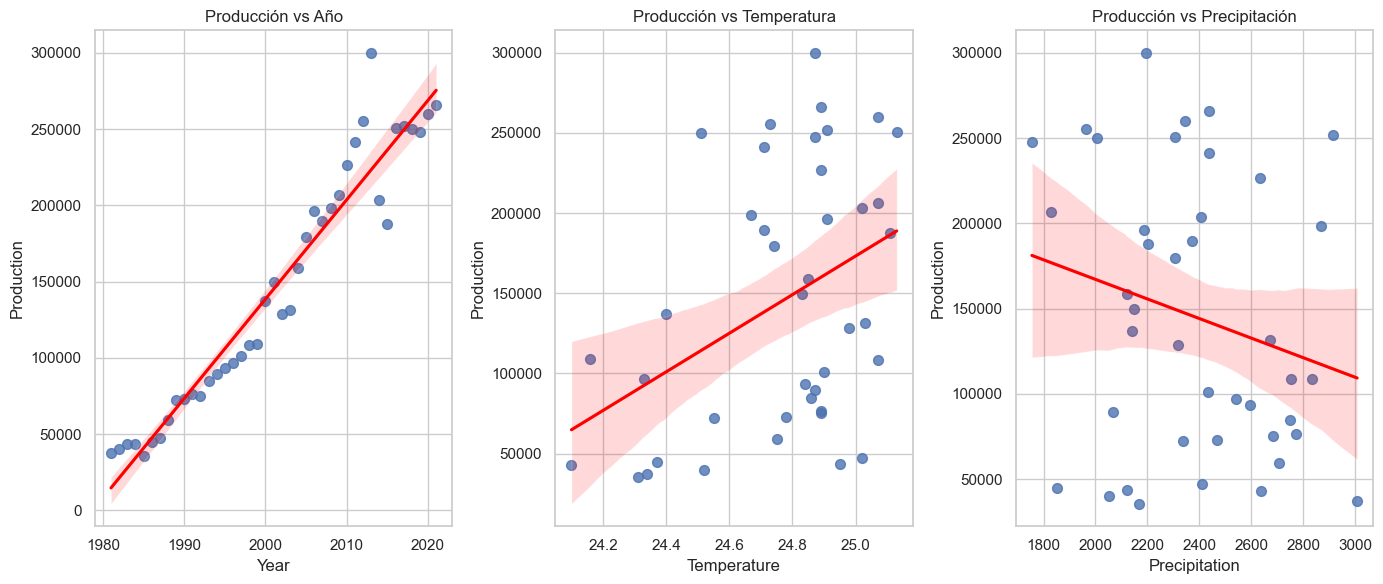

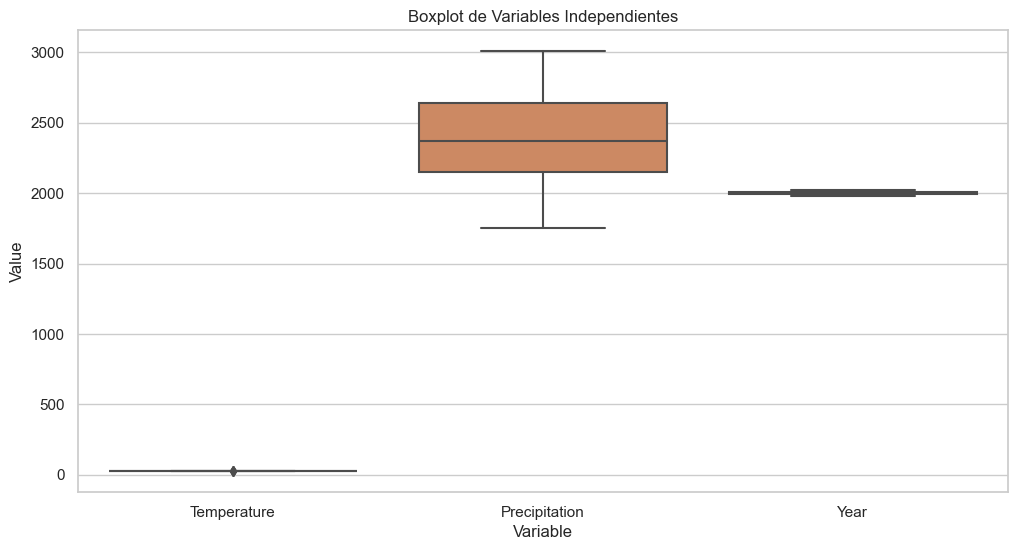

In [433]:
# Graficar los resultados de regresión lineal múltiple
sns.set(style="whitegrid")

# Producción vs. Año
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='Year', y='Production', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Producción vs Año')

# Producción vs. Temperatura
plt.subplot(1, 3, 2)
sns.regplot(x='Temperature', y='Production', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Producción vs Temperatura')

# Producción vs. Precipitación
plt.subplot(1, 3, 3)
sns.regplot(x='Precipitation', y='Production', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Producción vs Precipitación')

plt.tight_layout()
plt.show()

# Graficar los resultados de ANOVA
anova_plot_data = pd.melt(data, id_vars=['Production'], value_vars=['Temperature', 'Precipitation', 'Year'])
anova_plot_data.columns = ['Production', 'Variable', 'Value']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=anova_plot_data)
plt.title('Boxplot de Variables Independientes')
plt.show()